データ数 1797


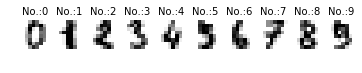

In [86]:
#データの読み込み

from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digit_data = load_digits(n_class=10)

print("データ数" , len(digit_data.data))
images_and_labels = list(zip(digit_data.images, digit_data.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(1, 10, index + 1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='none')
    plt.axis('off')
    plt.title('No.:%i' % label, fontsize=10)
plt.show()

In [94]:
#特徴量データ(x)とラベル(y)に分ける

import pandas as pd
y = pd.DataFrame(digit_data.target, columns=['target'])
x = pd.DataFrame(digit_data.data)
print(y.head(), " ラベル数 →", y.shape)
x.head()

   target
0       0
1       1
2       2
3       3
4       4  ラベル数 → (1797, 1)


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [95]:
#xとyを学習用とテスト用データに分ける

from sklearn.model_selection import train_test_split
# validation setはGridSearchCVが自動で作成してくれるため，訓練データとテストデータの分割のみを実行すればよい
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, shuffle = True, random_state = 1)
print(x_train.head())
print("x_train", x_train.shape)
print(x_test.head())
print("x_test", x_test.shape)
print(y_train.head())
print("y_train", y_train.shape)
print(y_test.head())
print("y_test", y_test.shape)

       0    1     2     3     4     5    6    7    8    9   ...   54   55  \
59    0.0  1.0  10.0  15.0  11.0   1.0  0.0  0.0  0.0  3.0  ...  1.0  0.0   
13    0.0  2.0   9.0  15.0  14.0   9.0  3.0  0.0  0.0  4.0  ...  6.0  0.0   
1786  0.0  0.0   4.0  14.0  15.0   6.0  0.0  0.0  0.0  5.0  ...  6.0  0.0   
940   0.0  3.0  12.0  12.0  14.0   4.0  0.0  0.0  0.0  1.0  ...  8.0  0.0   
387   0.0  0.0   0.0   0.0  13.0  16.0  6.0  0.0  0.0  0.0  ...  7.0  0.0   

       56   57    58    59    60    61   62   63  
59    0.0  0.0  13.0  16.0  15.0  10.0  0.0  0.0  
13    0.0  2.0  12.0  12.0  13.0  11.0  0.0  0.0  
1786  0.0  0.0   4.0  13.0  15.0   9.0  0.0  0.0  
940   0.0  2.0  13.0  16.0  16.0  16.0  2.0  0.0  
387   0.0  0.0   0.0   1.0  12.0  14.0  5.0  0.0  

[5 rows x 64 columns]
x_train (898, 64)
       0    1     2     3     4     5     6    7    8    9   ...   54   55  \
1227  0.0  0.0   6.0  16.0  11.0   0.0   0.0  0.0  0.0  0.0  ...  0.0  0.0   
1576  0.0  8.0  13.0  15.0  16.0  

In [96]:
#学習させて評価する
#グリッドサーチ(より正解率の高くなるパラメータを探索)

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
#★パラメータを dict 型で指定
param_values = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
param_grid = {'C': param_values,  'gamma' : param_values}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, iid=True)
# GridSearchCVは、訓練データの一部のデータを交差検証とグリッドサーチに使用→訓練データが少なくなるとcv(交差検証の回数)は少なく設定
# fit 関数を呼ぶことで交差検証とグリッドサーチがどちらも実行される
# y_train.valuesは、numpyを使った配列と同じものを返す
grid_search.fit(x_train, y_train.values.ravel())
#学習済みデータを保存
from sklearn.externals import joblib
joblib.dump(grid_search, 'digits.pkl')

print('Test set score: {}'.format(grid_search.score(x_test, y_test.values.ravel())))
print('Best parameters: {}'.format(grid_search.best_params_))
print('Best cross-validation: {}'.format(grid_search.best_score_))

Test set score: 0.9888765294771968
Best parameters: {'C': 5, 'gamma': 0.001}
Best cross-validation: 0.9910913140311804


    0    1    2         3         4         5         6    7    8    9   ...  \
0  0.0  0.0  0.0 -0.062745 -1.254902 -1.129412 -0.062745  0.0  0.0  0.0  ...   

         54   55   56       57        58        59        60        61   62  \
0 -1.380392  0.0  0.0 -0.25098 -1.254902 -1.631373 -1.317647 -0.690196  0.0   

         63  
0 -0.062745  

[1 rows x 64 columns]


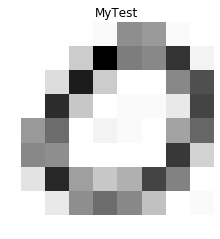

4

In [97]:
#新しい特徴量データから予測

import numpy as np
from PIL import Image
from sklearn.externals import joblib

# mytest_数値.pngでローカルに保存したファイル
image = Image.open('written_digit_data.png').convert('L') # 8bit(256階調) gray
image_resize = image.resize((8, 8), Image.LANCZOS)
test_data = np.array(image_resize, dtype=float) # ndarray型に変換
#test_data = test_data.reshape((test_data.shape[0],-1))
#test_data = (16 - np.floor(17 * test_data / 256))
#test_data = np.floor(16 - 16 * (test_data / 256))
test_data = (16*(test_data/255)-16)
test_data_flatten = pd.DataFrame(data=[test_data.flatten()])
print(test_data_flatten.head())
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(2, 5, 1)
ax.axis('off')
ax.set_title('MyTest')
ax.imshow(test_data,cmap=plt.cm.gray, interpolation='none')
plt.show()

grid_search_test = joblib.load("digits.pkl")
predict = grid_search_test.predict(test_data_flatten)
predict[0]